# First round of merging scoring results

In [170]:
import pandas as pd
import csv
import os

In [171]:
RESULTS_PATH = "../results/"
df0 = pd.read_csv(os.path.join(RESULTS_PATH, "docking_scores_and_accessibilities_and_pocket_edist.tsv"), sep="\t")
df1 = pd.read_csv(os.path.join(RESULTS_PATH, "reinvent_docking_scores_and_accessibilities_and_pocket_edist.tsv"), sep="\t")
dfd = pd.concat([df0, df1]).reset_index(drop=True)

In [172]:
dft = None
for file_name in os.listdir(RESULTS_PATH):
    if file_name.startswith("tanimoto-"):
        dft_ = pd.read_csv(os.path.join(RESULTS_PATH, file_name))
        if dft is None:
            dft = dft_
        else:
            dft = pd.concat([dft, dft_]).reset_index(drop=True)
dft.rename(columns={"input": "smiles"}, inplace=True)
dft.drop(columns=["key"], inplace=True)

dfo = None
for file_name in os.listdir(RESULTS_PATH):
    if file_name.startswith("other-"):
        dfo_ = pd.read_csv(os.path.join(RESULTS_PATH, file_name))
        if dfo is None:
            dfo = dfo_
        else:
            dfo = pd.concat([dfo, dfo_]).reset_index(drop=True)
dfo.rename(columns={"input": "smiles"}, inplace=True)
dfo.drop(columns=["key"], inplace=True)

In [173]:
df = dfd.merge(dft, on="smiles", how="left")
df = df.merge(dfo, on="smiles", how="left")
print(df.shape)

(201330, 18)


## Apply filters

In [174]:
df = df.drop_duplicates()
print(df.shape)

(200940, 18)


In [175]:
df = df[df["clogp"] < 3]
print(df.shape)

(86616, 18)


In [176]:
df = df[df["mw"] >= 250]
df = df[df["mw"] <= 350]
print(df.shape)

(58720, 18)


In [177]:
df = df[df["score"] < -15.2959] # score of the best docked fragment
print(df.shape)

(15710, 18)


In [178]:
df = df[df["accessibility"] < 0.4]
print(df.shape)

(15588, 18)


In [179]:
df = df[df["ts_train"] < 0.8]
print(df.shape)

(15496, 18)


In [180]:
df = df[df["class"] == 1]
print(df.shape)

(11234, 18)


In [181]:
df = df[df["qed"] > 0.8]
print(df.shape)

(2954, 18)


In [85]:
# at this point we calculate the ersilia score
with open("../data/generated/intermediate/filtered.csv", "w") as f:
    smiles = list(df["smiles"])
    writer = csv.writer(f)
    for smi in smiles:
        writer.writerow([smi])

In [87]:
# we run
# python ersilia_score.py

In [182]:
dfe = None
for file_name in os.listdir(RESULTS_PATH):
    if file_name.startswith("ersilia-eos2r5a-filtered"):
        dfe_ = pd.read_csv(os.path.join(RESULTS_PATH, file_name))
        if dfe is None:
            dfe = dfe_
        else:
            dfe = pd.concat([dfe, dfe_]).reset_index(drop=True)
dfe.rename(columns={"input": "smiles"}, inplace=True)
dfe.drop(columns=["key"], inplace=True)

df = df.merge(dfe, on="smiles", how="left")

dfe = None
for file_name in os.listdir(RESULTS_PATH):
    if file_name.startswith("ersilia-eos7pw8-filtered"):
        dfe_ = pd.read_csv(os.path.join(RESULTS_PATH, file_name))
        if dfe is None:
            dfe = dfe_
        else:
            dfe = pd.concat([dfe, dfe_]).reset_index(drop=True)
dfe.rename(columns={"input": "smiles", "score": "sa_score"}, inplace=True)
dfe.drop(columns=["key"], inplace=True)

df = df.merge(dfe, on="smiles", how="left")

In [183]:
df = df[df["ra_score"] > 0.9]
print(df.shape)

(3055, 20)


In [184]:
df = df[df["sa_score"] > 60]
print(df.shape)

(1911, 20)


In [185]:
df

,title,score,pocket_edist,smiles,accessibility,ph4_con_1,ph4_con_2,ph4_opt_1,ph4_opt_2,ph4_opt_3,ph4_opt_4,class,ts_train,ts_known,ts_pocketvec,mw,clogp,qed,ra_score,sa_score
9,6621,-18.4134,1.185739,CC1=[O+]CC(C(=O)Nc2nccc(-c3cccnc3)n2)CC1,0.282,0.00000,0.00000,8.354240,0.00000,99.000,0.000000,1,0.657895,0.277108,0.131579,297.338,2.01180,0.878941,0.989341,72.671280
10,6768,-15.6878,1.416130,CC1CCC(NC(=O)Nc2ccc3c(c2)OCCO3)CS1,0.244,0.00000,0.00000,13.453900,2.10763,99.000,0.108553,1,0.666667,0.206186,0.109589,308.403,2.86340,0.881799,0.993781,84.661507
15,7116,-17.1854,0.589569,CC1Cc2ccccc2N(C(=O)c2ccc3c(c2)OCC(=O)N3)C1,0.334,0.00000,0.00000,61.851800,34.19360,99.000,0.005286,1,0.313043,0.142857,0.120482,322.364,2.85650,0.878116,0.984693,79.253952
16,7201,-18.2340,0.545283,CC1[B-]CN(c2ccc(NC(=O)CN3CCc4ccccc4C3)cc2)C1,0.287,0.00000,0.00000,23.957400,2.23021,118.353,8.201210,1,0.679487,0.679487,0.136752,346.263,2.97350,0.864954,0.998984,127.367065
19,8340,-19.8925,1.421765,CCCNC(=O)CCCN1C(=O)CSc2ncccc21,0.218,0.00000,1.53080,47.171400,109.62600,99.000,0.000000,1,0.721519,0.140000,0.126437,293.392,1.82670,0.868902,0.989553,92.067947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,9-9564,-15.7246,0.481334,n1cncc(C(c2c(C)cc(F)cc2)N2CCN(C)CCC2)c1,0.231,2.34982,7.09281,99.000000,99.00000,99.000,0.249156,1,0.224719,0.127907,0.111111,314.408,2.65102,0.871712,0.981835,65.305257
3675,1-9273,-17.8068,0.800794,c1cncc(CN2CC3C(C(NC(=O)c4ccccc4)CC3)C2)c1,0.258,1.61785,0.00000,0.723546,4.60925,99.000,8.174840,1,0.516484,0.202247,0.183099,321.424,2.72200,0.941618,0.993246,66.572241
3676,1-9416,-15.8074,0.838794,c1cscc1-c1scc(CNC2CCOC2)n1,0.210,0.00000,0.00000,99.000000,99.00000,99.000,0.000000,1,0.280899,0.106383,0.089744,266.391,2.75010,0.923698,0.944174,83.455103
3679,1-9469,-17.6506,0.523842,c1nc(-c2ncccc2)cc(C(N2CCC(C(N)=O)CC2)=O)c1,0.249,0.00000,0.00000,78.187200,63.76580,99.000,0.000000,1,0.385542,0.195402,0.168317,310.357,1.48110,0.929618,0.993573,101.030042


In [186]:
df = df[df["pocket_edist"] < 0.2]
print(df.shape)

(6, 20)


In [153]:
df = df[df["qed"] > 0.8]
print(df.shape)

(1260, 20)


(array([   5.,   70.,  421., 1461., 1936., 1171.,  670.,  318.,   83.,
          11.]),
 array([-50.22108014, -26.7189448 ,  -3.21680946,  20.28532588,
         43.78746122,  67.28959655,  90.79173189, 114.29386723,
        137.79600257, 161.29813791, 184.80027324]),
 <BarContainer object of 10 artists>)

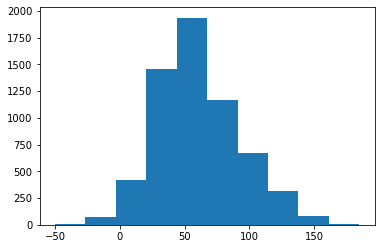

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df["score_y"])

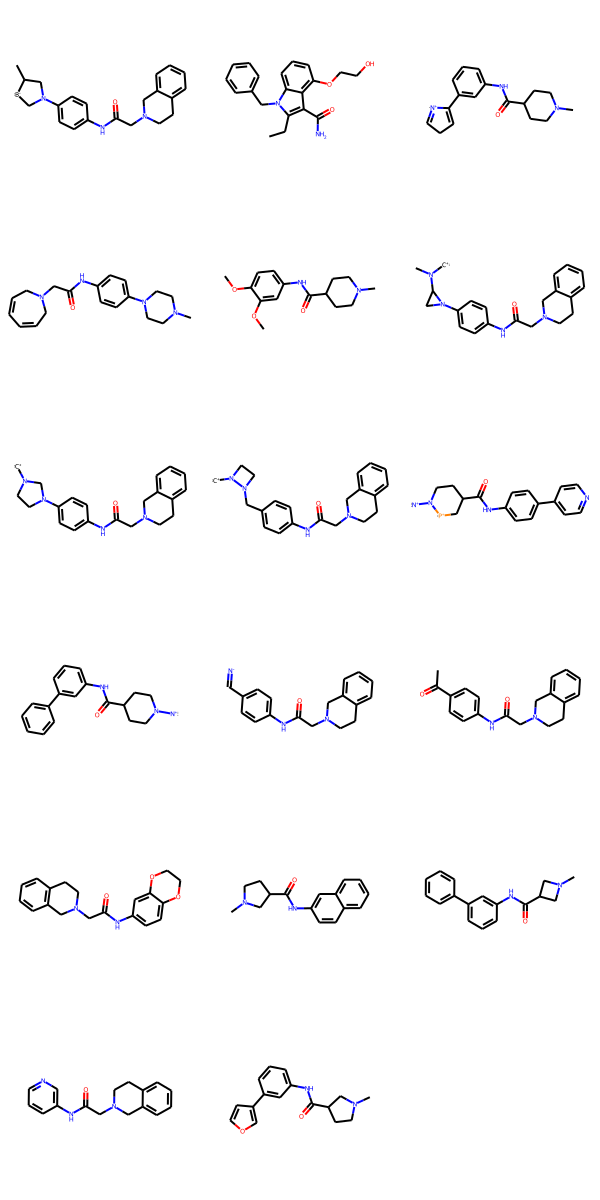

In [151]:
from rdkit.Chem import Draw
from rdkit import Chem

def draw_molecules(df):
    mols = [Chem.MolFromSmiles(smi) for smi in list(df["smiles"])]
    img = Draw.MolsToGridImage(mols[:100])
    return img

draw_molecules(df[(df["ts_pocketvec"] > 0.5) | (df["ts_known"] > 0.5)])

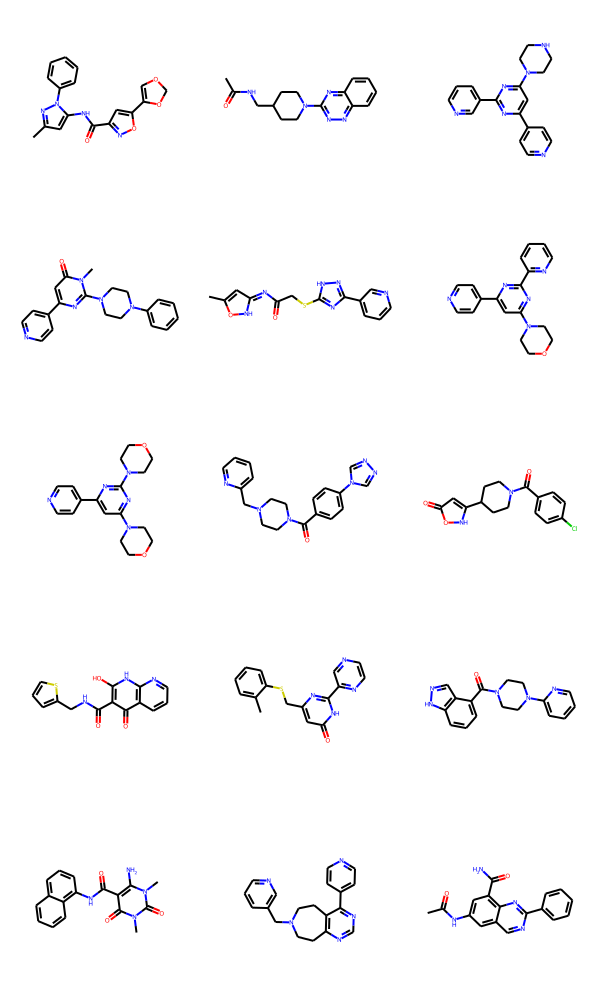

In [152]:
draw_molecules(df[df["pocket_edist"] < 0.2])

In [124]:
df

,title,score,pocket_edist,smiles,accessibility,ph4_con_1,ph4_con_2,ph4_opt_1,ph4_opt_2,ph4_opt_3,ph4_opt_4,class,ts_train,ts_known,ts_pocketvec,mw,clogp,qed,ra_score
2,450,-20.4859,0.717004,Bc1cccc(Nc2nnc(Cc3ccc(Cl)cc3)c(=O)[nH]2)c1C,0.228,0.000000,0.0,38.09300,0.444054,13.749500,1.927660,1,0.732394,0.106195,0.113402,338.607,1.71952,0.710707,0.945053
3,4606,-16.9920,1.859118,CC(C)N(CC(=O)O[N+])CC1COc2ccccc2O1,0.250,2.401570,0.0,78.89200,81.173900,99.000000,1.582990,1,0.721311,0.139785,0.151899,278.308,1.06370,0.753270,0.995618
4,4737,-15.9658,0.747808,CC(C)NC(=O)C1CN(Cc2ccc(F)cn2)CC12CCCC2,0.195,4.391610,0.0,40.98310,106.388000,99.000000,6.126020,1,0.582278,0.130435,0.160494,319.424,2.73750,0.927980,0.917719
5,5026,-17.9843,1.044883,CC(C)c1ncc(C(=O)Nc2cc(C(N)=O)cc(C(N)O)c2)s1,0.257,0.000000,0.0,1.38435,0.124558,99.000000,0.752307,1,0.711864,0.154762,0.122222,334.401,1.56730,0.616280,0.914186
6,5027,-17.9213,1.066190,CC(C)c1ncc(C(=O)Nc2cc(C(N)=O)cc([C-](N)O)c2)s1,0.258,0.000000,0.0,1.26801,0.124941,99.000000,0.663216,1,0.700000,0.153061,0.120879,333.393,1.78649,0.619399,0.980748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,10-3741,-19.5052,0.936479,c12ccccc1nc(-c1ccc[nH]c1=O)cc2C(Nc1cnco1)=O,0.217,0.000000,0.0,15.57510,0.000000,99.000000,0.000651,1,0.404040,0.154545,0.153061,332.319,2.83040,0.600597,0.974922
8926,10-3804,-19.6173,0.415238,c12ccccc1nc(-c1nc(=O)cc(-c3ccccc3)[nH]1)oc2=O,0.331,0.000000,0.0,99.00000,99.000000,0.071066,0.973520,1,0.432432,0.128713,0.166667,317.304,2.60530,0.613643,0.902757
8927,10-3823,-18.7105,1.165791,c12ccccc1nc(-c1nccnc1)cc2C(=O)Nc1cnco1,0.221,0.000000,0.0,16.76640,41.341700,99.000000,0.000000,1,0.437500,0.161290,0.135417,317.308,2.93210,0.624130,0.994342
8928,10-3872,-17.7010,0.935986,c12ccccc1nc(-c1sc(=N)[nH]c1)cc2C(N)=O,0.229,0.000000,0.0,15.79800,6.351860,99.000000,0.000000,1,0.412698,0.132653,0.213333,270.317,1.86977,0.662450,0.981214


In [187]:
import joblib